In [7]:
import os
import pandas as pd
import numpy as np

In [11]:
RAW_DIR = 'BRAZ/'
SILVER_DIR = 'BRAZ/silver/'
GOLD_DIR = 'BRAZ/gold/'
os.makedirs(SILVER_DIR, exist_ok=True)
os.makedirs(GOLD_DIR, exist_ok=True)

In [13]:
import pandas as pd

customers = pd.read_csv('BRAZ/olist_customers_dataset.csv')
geolocation = pd.read_csv('BRAZ/olist_geolocation_dataset.csv')
order_items = pd.read_csv('BRAZ/olist_order_items_dataset.csv')
order_payments = pd.read_csv('BRAZ/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('BRAZ/olist_order_reviews_dataset.csv')
orders = pd.read_csv('BRAZ/olist_orders_dataset.csv')
products = pd.read_csv('BRAZ/olist_products_dataset.csv')
sellers = pd.read_csv('BRAZ/olist_sellers_dataset.csv')
category_translation = pd.read_csv('BRAZ/product_category_name_translation.csv')

## EDA

In [40]:
print("=== CUSTOMERS ===")
print(customers.info())
print(customers.describe(include='all'))
print(customers.isnull().sum())
print(customers.nunique())
print(customers.duplicated().sum())
print(customers.head())

# Value counts for categorical columns
print(customers['customer_state'].value_counts())
print(customers['customer_city'].value_counts().head(20))

# Check for whitespace or case issues
print(customers['customer_city'].apply(lambda x: x.strip()).value_counts().head(10))
print(customers['customer_state'].apply(lambda x: x.strip().upper()).value_counts())

=== CUSTOMERS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN           

In [33]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [29]:
pip install unidecode

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


=== GEOLOCATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04 

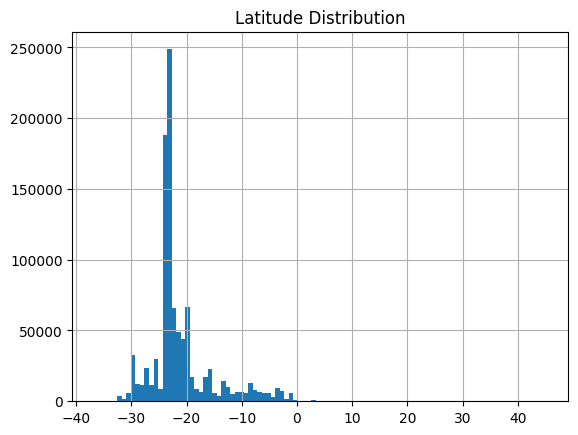

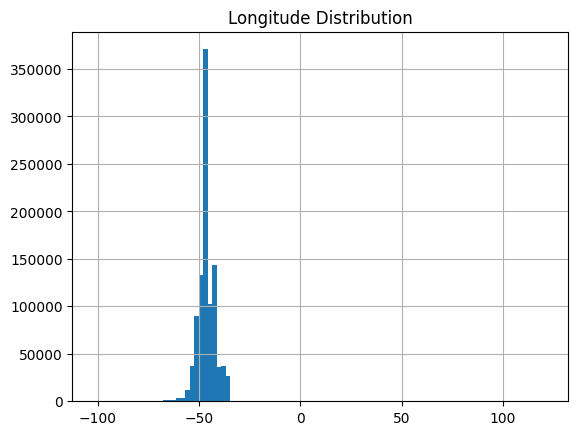

In [41]:
print("=== GEOLOCATION ===")
print(geolocation.info())
print(geolocation.describe())
print(geolocation.isnull().sum())
print(geolocation.nunique())
print(geolocation.duplicated().sum())
print(geolocation.head())

# Value counts for categorical columns
print(geolocation['geolocation_state'].value_counts())
print(geolocation['geolocation_city'].value_counts().head(20))

# Check for outliers in lat/lng
print(geolocation[['geolocation_lat', 'geolocation_lng']].describe())
import matplotlib.pyplot as plt
geolocation['geolocation_lat'].hist(bins=100)
plt.title('Latitude Distribution')
plt.show()
geolocation['geolocation_lng'].hist(bins=100)
plt.title('Longitude Distribution')
plt.show()

In [42]:
print("=== ORDER ITEMS ===")
print(order_items.info())
print(order_items.describe())
print(order_items.isnull().sum())
print(order_items.nunique())
print(order_items.duplicated().sum())
print(order_items.head())

# Value counts for categorical columns
print(order_items['order_id'].value_counts().head(10))
print(order_items['product_id'].value_counts().head(10))
print(order_items['seller_id'].value_counts().head(10))

# Check for negative or zero prices/freight
print(order_items[order_items['price'] <= 0])
print(order_items[order_items['freight_value'] < 0])

=== ORDER ITEMS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000   

In [43]:
print("=== ORDER PAYMENTS ===")
print(order_payments.info())
print(order_payments.describe())
print(order_payments.isnull().sum())
print(order_payments.nunique())
print(order_payments.duplicated().sum())
print(order_payments.head())

# Value counts for categorical columns
print(order_payments['payment_type'].value_counts())
print(order_payments['order_id'].value_counts().head(10))

# Check for negative or zero payment values
print(order_payments[order_payments['payment_value'] <= 0])

=== ORDER PAYMENTS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.00

In [44]:
print("=== ORDER REVIEWS ===")
print(order_reviews.info())
print(order_reviews.describe(include='all'))
print(order_reviews.isnull().sum())
print(order_reviews.nunique())
print(order_reviews.duplicated().sum())
print(order_reviews.head())

# Value counts for categorical columns
print(order_reviews['review_score'].value_counts())
print(order_reviews['review_comment_title'].isnull().mean())
print(order_reviews['review_comment_message'].isnull().mean())

# Check for duplicate reviews
print(order_reviews['review_id'].duplicated().sum())

=== ORDER REVIEWS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None
                               review_id                          order_id  \
count                              99224                             99224   
unique                             98410                             98673   
top     7b606b0d57b078384f0b58eac1d41d78  c88b1d1b157a9999ce368f218a407141   
freq                      

In [51]:
print("=== ORDERS ===\n")

# Basic info
print("Data Info:\n")
orders.info()

# Descriptive statistics
print("\nDescriptive Statistics:\n")
print(orders.describe(include='all'))

# Missing values per column
print("\nMissing Values:\n")
print(orders.isnull().sum())

# Unique values per column
print("\nUnique Values:\n")
print(orders.nunique())

# Number of duplicate rows
print("\nDuplicate Rows:\n")
print(orders.duplicated().sum())

# Preview first 5 rows
print("\nFirst 5 Rows:\n")
print(orders.head())

# Value counts for selected categorical columns
print("\nOrder Status Value Counts:\n")
print(orders['order_status'].value_counts())

print("\nTop 10 Most Frequent Customer IDs:\n")
print(orders['customer_id'].value_counts().head(10))

# Check date columns: convert and analyze
print("\nDate Column Ranges and Nulls:\n")
date_cols = [col for col in orders.columns if 'date' in col.lower()]

# Convert date columns to datetime
for col in date_cols:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')

# Print min, max, and nulls for each date column
for col in date_cols:
    min_date = orders[col].min()
    max_date = orders[col].max()
    nulls = orders[col].isnull().sum()
    print(f"{col}: min = {min_date}, max = {max_date}, nulls = {nulls}")


=== ORDERS ===

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

Descriptive Statistics:

                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441            

In [46]:
print("=== PRODUCTS ===")
print(products.info())
print(products.describe(include='all'))
print(products.isnull().sum())
print(products.nunique())
print(products.duplicated().sum())
print(products.head())

# Value counts for categorical columns
print(products['product_category_name'].value_counts().head(20))

# Check for missing or zero weights/dimensions
for col in ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
    print(f"{col}: missing={products[col].isnull().sum()}, zeros={(products[col]==0).sum()}")
    

=== PRODUCTS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
                              product_id product_category_name  \
count                              32951                 32341   
unique                             32951                   

In [47]:
print("=== SELLERS ===")
print(sellers.info())
print(sellers.describe(include='all'))
print(sellers.isnull().sum())
print(sellers.nunique())
print(sellers.duplicated().sum())
print(sellers.head())

# Value counts for categorical columns
print(sellers['seller_city'].value_counts().head(20))
print(sellers['seller_state'].value_counts())

# Check for whitespace or case issues
print(sellers['seller_city'].apply(lambda x: x.strip().lower()).value_counts().head(10))
print(sellers['seller_state'].apply(lambda x: x.strip().upper()).value_counts())

=== SELLERS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
                               seller_id  seller_zip_code_prefix seller_city  \
count                               3095             3095.000000        3095   
unique                              3095                     NaN         611   
top     3442f8959a84dea7ee197c632cb2df15                     NaN   sao paulo   
freq                                   1                     NaN         694   
mean                                 NaN            32291.059451         NaN   
std                           

In [48]:
print("=== CATEGORY TRANSLATION ===")
print(category_translation.info())
print(category_translation.describe(include='all'))
print(category_translation.isnull().sum())
print(category_translation.nunique())
print(category_translation.duplicated().sum())
print(category_translation.head())

# Check for missing translations
print(category_translation[category_translation['product_category_name_english'].isnull()])

=== CATEGORY TRANSLATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None
       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1
product_category_name            0
product_category_name_english    0
dtype: int64
product_category_name            71
product_category_name_english    71
dtype: int64
0
    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informat